In [1]:
import pandas as pd

In [2]:
scores_cs = pd.read_csv("corpus/cs-en/scores.csv")
scores_de = pd.read_csv("corpus/de-en/scores.csv")
scores_en_fi = pd.read_csv("corpus/en-fi/scores.csv")
scores_en_zh = pd.read_csv("corpus/en-zh/scores.csv")
scores_ru = pd.read_csv("corpus/ru-en/scores.csv")
scores_zh = pd.read_csv("corpus/zh-en/scores.csv")

In [3]:
scores_cs.head(1)

,source,reference,translation,z-score,avg-score,annotators
0,Uchopíte pak zbraň mezi své předloktí a rameno...,You will then grab the weapon between your for...,You then grasp the gun between your forearm an...,-0.675383,60.0,3


In [4]:
scores_de.head(1)

,source,reference,translation,z-score,avg-score,annotators
0,"Ihr Zeitlupentempo maßen sie, als sie vor Spit...",Her timeless pace measures them when they equi...,Their slow speed was measured by researchers o...,-0.345024,76.0,1


In [5]:
scores_en_fi.head(1)

,source,reference,translation,z-score,avg-score,annotators
0,"You can turn yourself into a pineapple, a dog ...","Voit muuttaa itsesi ananasta, koirasta tai Roy...","Voit muuttaa itsesi ananakseksi, koiraksi tai ...",-0.286195,34.2,5


In [6]:
scores_en_zh.head(1)

,source,reference,translation,z-score,avg-score,annotators
0,"""In the GISS model's simulation, Venus' slow s...",GSIS的科学家AnthonyDelGenio在新闻稿中解释说：“在GISS模型的模拟模型中...,戈达德太空研究所科学家安东尼·德尔·杰尼奥在新闻发布会上解释说：“在戈达德太空研究所的模型模...,-1.171867,50.0,1


In [7]:
scores_ru.head(1)

,source,reference,translation,z-score,avg-score,annotators
0,В этом году крымчане получат уведомление на оп...,This year the Crimeans will receive a notice f...,"This year, residents of Crimea will receive a ...",0.878043,92.0,1


In [8]:
scores_zh.head(1)

,source,reference,translation,z-score,avg-score,annotators
0,他性格活泼，这对英国赛马来说是好事，但是除此之外，他还是一位不可思议的骑师。,"His character is good for the British horse, b...",He's a lively character which is good for Brit...,0.625559,92.75,4


## Text Preprocessing

In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook as tqdm

In [10]:
#stop_words_english = set(stopwords.words('english'))
#stop_words_finnish = open("stop_words_finnish.txt", "r").read().split()
#stop_words_chinese = open("stop_words_chinese.txt", encoding="utf8").read().split()

In [11]:
def preprocessing(dataframe, column, pontuation = False):
    processed_corpus = []
    #stop_words = set(stopwords.words())
    for i in tqdm(range(len(dataframe))):
        text = dataframe[column][i]
        
        #Remove punctuations
        if pontuation==True:
            text = re.sub(r'[\s+\.\!\/_,$%^*(+\"\']+|[+——！，？、~@#￥%……&*（）:：；《）《》“”()»〔〕-]+', ' ', text)
        else:
            pass

        #Convert to lowercase
        text = text.lower()

        #remove tags
        text = BeautifulSoup(text).get_text()
        
        # Convert to list from string
        text = text.split()

        #Lemmatisation
        lem = WordNetLemmatizer()
        #text = [lem.lemmatize(word) for word in text if not word in stop_words] 
        text = " ".join(text)
        processed_corpus.append(text)
    return processed_corpus

In [12]:
references_cs = preprocessing(scores_cs, 'reference')
references_de = preprocessing(scores_de, 'reference')
references_en_fi = preprocessing(scores_en_fi, 'reference')
references_en_zh = preprocessing(scores_en_zh, 'reference')
references_ru = preprocessing(scores_ru, 'reference')
references_zh = preprocessing(scores_zh, 'reference')

<ipython-input-11-c90612280699>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(len(dataframe))):


  0%|          | 0/11585 [00:00<?, ?it/s]

  0%|          | 0/21704 [00:00<?, ?it/s]

  0%|          | 0/6748 [00:00<?, ?it/s]

  0%|          | 0/10221 [00:00<?, ?it/s]

  0%|          | 0/17980 [00:00<?, ?it/s]

C:\Users\User\anaconda3\lib\site-packages\bs4\__init__.py:332: MarkupResemblesLocatorWarning: "." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


  0%|          | 0/26419 [00:00<?, ?it/s]

In [13]:
translation_cs = preprocessing(scores_cs, 'translation')
translation_de = preprocessing(scores_de, 'translation')
translation_en_fi = preprocessing(scores_en_fi, 'translation')
translation_en_zh = preprocessing(scores_en_zh, 'translation')
translation_ru = preprocessing(scores_ru, 'translation')
translation_zh = preprocessing(scores_zh, 'translation')

<ipython-input-11-c90612280699>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(len(dataframe))):


  0%|          | 0/11585 [00:00<?, ?it/s]

  0%|          | 0/21704 [00:00<?, ?it/s]

  0%|          | 0/6748 [00:00<?, ?it/s]

  0%|          | 0/10221 [00:00<?, ?it/s]

  0%|          | 0/17980 [00:00<?, ?it/s]

  0%|          | 0/26419 [00:00<?, ?it/s]

In [16]:
translation_en_fi[4]

'macdonaldin, joka tuli cbc:n selostajatiimiin tuomaan ”väriä”, kuultiin sanovan: ”tuo pikkuinen 14-vuotias kiinasta möhläsi, baby.'

In [17]:
scores_en_fi['translation'][4]

'MacDonaldin, joka tuli CBC:n selostajatiimiin tuomaan ”väriä”, kuultiin sanovan: ”Tuo pikkuinen 14-vuotias Kiinasta möhläsi, baby.'

## Bag-of-Words

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(
    max_df=0.8,
    #stop_words="english", 
    max_features=10000, 
    ngram_range=(1,3)
)

In [20]:
X = cv.fit_transform(references_cs)

In [21]:
list(cv.vocabulary_.keys())[:10]

['you',
 'will',
 'then',
 'the',
 'weapon',
 'between',
 'your',
 'and',
 'just',
 'before']

In [22]:
def get_top_n_grams(corpus, top_k, n):
    """
    Function that receives a list of documents (corpus) and extracts
        the top k most frequent n-grams for that corpus.
        
    :param corpus: list of texts
    :param top_k: int with the number of n-grams that we want to extract
    :param n: n gram type to be considered 
             (if n=1 extracts unigrams, if n=2 extracts bigrams, ...)
             
    :return: Returns a sorted dataframe in which the first column 
        contains the extracted ngrams and the second column contains
        the respective counts
    """
    vec = CountVectorizer(ngram_range=(n, n), max_features=2000).fit(corpus)
    
    bag_of_words = vec.transform(corpus)
    
    sum_words = bag_of_words.sum(axis=0) 
    
    words_freq = []
    for word, idx in vec.vocabulary_.items():
        words_freq.append((word, sum_words[0, idx]))
        
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_df = pd.DataFrame(words_freq[:top_k])
    top_df.columns = ["Ngram", "Freq"]
    return top_df

In [25]:
import numpy as np
import matplotlib.pyplot as plt
def plot_frequencies(top_df):
    """
    Function that receives a dataframe from the "get_top_n_grams" function
    and plots the frequencies in a bar plot.
    """
    x_labels = top_df["Ngram"][:30]
    y_pos = np.arange(len(x_labels))
    values = top_df["Freq"][:30]
    plt.bar(y_pos, values, align='center', alpha=0.5)
    plt.xticks(y_pos, x_labels)
    plt.ylabel('Frequencies')
    plt.title('Words')
    plt.xticks(rotation=90)
    plt.show()

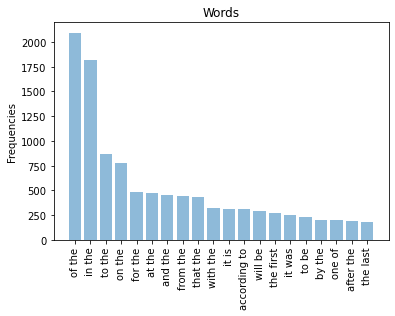

In [28]:
top_df = get_top_n_grams(references_cs, top_k=20, n=2)
plot_frequencies(top_df)

# Rouge ???

In [37]:
from rouge import Rouge

In [38]:
model_out = translation_ru[4]

ref_out = references_ru[4]

In [39]:
rouge = Rouge()

In [40]:
rouge.get_scores(model_out, ref_out)

[{'rouge-1': {'f': 0.33333332847222225, 'p': 0.4, 'r': 0.2857142857142857},
  'rouge-2': {'f': 0.1999999952000001, 'p': 0.25, 'r': 0.16666666666666666},
  'rouge-l': {'f': 0.33333332847222225, 'p': 0.4, 'r': 0.2857142857142857}}]

In [41]:
rouge.get_scores(model_out, ref_out, avg=True)

{'rouge-1': {'f': 0.33333332847222225, 'p': 0.4, 'r': 0.2857142857142857},
 'rouge-2': {'f': 0.1999999952000001, 'p': 0.25, 'r': 0.16666666666666666},
 'rouge-l': {'f': 0.33333332847222225, 'p': 0.4, 'r': 0.2857142857142857}}

In [43]:
references_ru[4]

'is ethiopia on the verge of schism?'

# chrf_score

In [44]:
# https://www.nltk.org/_modules/nltk/translate/chrf_score.html
import nltk.translate.chrf_score as chrf

In [40]:
a = translation[4].split()
b = references[4].split()

In [46]:
#print(chrf.sentence_chrf(a, b))
print(chrf.sentence_chrf(translation_ru[4], references_ru[4]))

0.39355200651404104


In [47]:
#chrf.corpus_chrf([translation[4]], [references[4]])
#chrf.chrf_precision_recall_fscore_support(a, b, n=1)

In [48]:
def chf(translation, references):
    chf = []
    for i in range(len(translation)):
        row = chrf.sentence_chrf([translation[i]], references[i])
        chf.append(row)
    return chf

translation_cs   
translation_de   
translation_en_fi   
translation_en_zh   
translation_ru   
translation_zh   

references_cs   
references_de   
references_en_fi   
references_en_zh   
references_ru   
references_zh   

In [53]:
chf_cs = chf(translation_cs, references_cs)
scores_cs['chf'] = chf_cs

In [54]:
chf_de = chf(translation_de, references_de)
scores_de['chf'] = chf_de

In [55]:
chf_en_fi = chf(translation_en_fi, references_en_fi)
scores_en_fi['chf'] = chf_en_fi

In [56]:
chf_en_zh = chf(translation_en_zh, references_en_zh)
scores_en_zh['chf'] = chf_en_zh

In [50]:
chf_ru = chf(translation_ru, references_ru)
scores_ru['chf'] = chf_ru

In [57]:
chf_zh = chf(translation_zh, references_zh)
scores_zh['chf'] = chf_zh

# GLEU

In [63]:
import nltk
import nltk.translate.gleu_score as gleu

import numpy
import os

try:
  nltk.data.find('tokenizers/punkt')
except LookupError:
  nltk.download('punkt')

In [65]:
#hyp = str(translation_ru[4]).split()
#ref_a = str(references_ru[4]).split()

In [66]:
#score_ref_a = gleu.sentence_gleu([ref_a], hyp)
#print("Hyp and ref_a are the same: {}".format(score_ref_a))
#score_ref_a = gleu.corpus_gleu([[ref_a]], [hyp])
#print("1 document with 1 reference sentence: {}".format(score_ref_a))

In [67]:
#score_1to4grams = gleu.sentence_gleu([ref_a], hyp, min_len=1, max_len=4)
#score_1to2grams = gleu.sentence_gleu([ref_a], hyp, min_len=1, max_len=2)
#print("1 to 4 grams: {}".format(score_1to4grams))
#print("1 to 2 grams: {}".format(score_1to2grams))

In [69]:
def gleu_metric(translation, references):
    gleu_metric = []
    for i in range(len(translation)):
        row = gleu.sentence_gleu([str(references[i]).split()], str(translation[i]).split(), min_len=1, max_len=2)
        gleu_metric.append(row)
    return gleu_metric

In [70]:
gleu_cs = gleu_metric(translation_cs, references_cs)
scores_cs['gleu'] = gleu_cs

gleu_de = gleu_metric(translation_de, references_de)
scores_de['gleu'] = gleu_de

gleu_en_fi = gleu_metric(translation_en_fi, references_en_fi)
scores_en_fi['gleu'] = gleu_en_fi

gleu_en_zh = gleu_metric(translation_en_zh, references_en_zh)
scores_en_zh['gleu'] = gleu_en_zh

gleu_ru = gleu_metric(translation_ru, references_ru)
scores_ru['gleu'] = gleu_ru

gleu_zh = gleu_metric(translation_zh, references_zh)
scores_zh['gleu'] = gleu_zh

# Meteor

In [72]:
import nltk.translate.meteor_score as meteor
#meteor.meteor_score([translation[4]], references[4])

In [75]:
def meteor_metric(translation, references):
    meteor_metric = []
    for i in range(len(translation)):
        row = (meteor.meteor_score([translation[i]], references[i]))
        meteor_metric.append(row)
    return meteor_metric

In [76]:
meteor_cs = meteor_metric(translation_cs, references_cs)
scores_cs['meteor'] = meteor_cs

meteor_de = meteor_metric(translation_de, references_de)
scores_de['meteor'] = meteor_de

meteor_en_fi = meteor_metric(translation_en_fi, references_en_fi)
scores_en_fi['meteor'] = meteor_en_fi

meteor_en_zh = meteor_metric(translation_en_zh, references_en_zh)
scores_en_zh['meteor'] = meteor_en_zh

meteor_ru = meteor_metric(translation_ru, references_ru)
scores_ru['meteor'] = meteor_ru

meteor_zh = meteor_metric(translation_zh, references_zh)
scores_zh['meteor'] = meteor_zh

# Correlation

In [86]:
def corr(scores):
    chf = scores['z-score'].corr(scores['chf'])
    gleu = scores['z-score'].corr(scores['gleu'])
    meteor = scores['z-score'].corr(scores['meteor'])
    corr = [chf, gleu, meteor]
    return corr

In [90]:
corr_cs = corr(scores_cs)
corr_de = corr(scores_de)
corr_en_fi = corr(scores_en_fi)
corr_en_zh = corr(scores_en_zh)
corr_ru = corr(scores_ru)
corr_zh = corr(scores_zh)

## Compare different metrics

In [91]:
columns = ['chf', 'gleu', 'meteor']
data = []
index = ['scores_cs', 'scores_de', 'scores_en_fi', 'scores_en_zh', 'scores_ru', 'scores_zh']
correlation = pd.DataFrame(data, columns=columns, index = index)
correlation

,chf,gleu,meteor
scores_cs,NaN,NaN,NaN
scores_de,NaN,NaN,NaN
scores_en_fi,NaN,NaN,NaN
scores_en_zh,NaN,NaN,NaN
scores_ru,NaN,NaN,NaN
scores_zh,NaN,NaN,NaN


In [92]:
correlation.iloc[0] = corr_cs
correlation.iloc[1] = corr_de
correlation.iloc[2] = corr_en_fi
correlation.iloc[3] = corr_en_zh
correlation.iloc[4] = corr_ru
correlation.iloc[5] = corr_zh

In [93]:
correlation

,chf,gleu,meteor
scores_cs,0.461471,0.422259,0.433119
scores_de,0.340088,0.307939,0.306916
scores_en_fi,0.611567,0.494636,0.491475
scores_en_zh,0.435768,0.029686,0.023118
scores_ru,0.360373,0.33299,0.33616
scores_zh,0.340421,0.315322,0.3241
